In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, n_iterations=500, add_interactions=False, convergence_threshold=1e-4):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.add_interactions_flag = add_interactions
        self.convergence_threshold = convergence_threshold
        self.weights = None

    @staticmethod
    def generate_interactions(X):
        n_features = X.shape[1]
        interactions = [(X[:, i] * X[:, j]).reshape(-1, 1) for i in range(n_features) for j in range(i+1, n_features)]
        return np.hstack([X] + interactions)

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def compute_gradient(X, y, weights):
        predictions = LogisticRegressionSGD.sigmoid(np.dot(X, weights))
        errors = predictions - y
        gradient = np.dot(X.T, errors)
        return gradient

    def fit(self, X, y):
        if self.add_interactions_flag:
            X = self.generate_interactions(X)
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.weights = np.random.rand(X.shape[1])
        prev_log_likelihood = None
        log_likelihoods = []

        for iteration in range(1, self.n_iterations + 1): # stopping rule
            weight_change = np.zeros(self.weights.shape)
            for i in range(X.shape[0]):
                idx = np.random.randint(0, X.shape[0])
                X_i = X[idx, :].reshape(1, -1)
                y_i = y[idx]
                gradient = self.compute_gradient(X_i, y_i, self.weights)
                self.weights -= self.learning_rate * gradient

            predictions = self.sigmoid(np.dot(X, self.weights))
            log_likelihood = np.sum(y * np.log(predictions + 1e-9) + (1 - y) * np.log(1 - predictions + 1e-9))
            log_likelihoods.append(log_likelihood)

            if prev_log_likelihood is not None and abs(log_likelihood - prev_log_likelihood) < self.convergence_threshold:
                print(f"Converged at iteration {iteration}.")
                break
            prev_log_likelihood = log_likelihood

        return log_likelihoods

    def predict_proba(self, X):
        if self.add_interactions_flag:
            X = self.generate_interactions(X)
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.sigmoid(np.dot(X, self.weights))

    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)


In [3]:
# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_clusters_per_class=1, weights=[0.5, 0.5], flip_y=0, random_state=42)

In [4]:
n_splits = 5
balanced_accuracies_without_interactions = []
balanced_accuracies_with_interactions = []

for split in range(n_splits):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train and evaluate the model without interactions
    model_without_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=False)
    log_likelihoods_without_interactions = model_without_interactions.fit(X_train, y_train)
    predictions_without = model_without_interactions.predict(X_test)
    balanced_accuracy_without = balanced_accuracy_score(y_test, predictions_without)
    balanced_accuracies_without_interactions.append(balanced_accuracy_without)

    # Train and evaluate the model with interactions
    model_with_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=True)
    log_likelihoods_with_interactions = model_with_interactions.fit(X_train, y_train)
    predictions_with = model_with_interactions.predict(X_test)
    balanced_accuracy_with = balanced_accuracy_score(y_test, predictions_with)
    balanced_accuracies_with_interactions.append(balanced_accuracy_with)

# Calculate and print average balanced accuracies
avg_balanced_accuracy_without = np.mean(balanced_accuracies_without_interactions)
avg_balanced_accuracy_with = np.mean(balanced_accuracies_with_interactions)

# 2. For all algorithms as performance measure use Balanced Accuracy.

print(f"Average balanced accuracy without interactions: {avg_balanced_accuracy_without}")
print(f"Average balanced accuracy with interactions: {avg_balanced_accuracy_with}")

Converged at iteration 357.
Converged at iteration 395.
Average balanced accuracy without interactions: 0.9211286663421661
Average balanced accuracy with interactions: 0.930353703939125


In [5]:
log_likelihoods_without_interactions

[-247.99048529223074,
 -206.98258994907115,
 -189.4987594336325,
 -178.44793220754195,
 -172.5690104188174,
 -166.95661731426708,
 -162.64555220974333,
 -162.07098569949653,
 -156.5040328384203,
 -154.0158400715029,
 -152.79930223494455,
 -150.6488363628072,
 -150.39934505741218,
 -148.75709408394948,
 -148.97962724868103,
 -147.64814822934525,
 -147.20165794617805,
 -146.0890981681986,
 -145.29369477811736,
 -145.13371243246655,
 -144.9252079000196,
 -144.34852526363164,
 -144.3702626060631,
 -143.75241512074845,
 -144.70060598882614,
 -143.4789163207756,
 -143.35608650264987,
 -143.20981980105918,
 -143.50219887016598,
 -142.9012111376383,
 -142.576548925371,
 -142.98403038244078,
 -142.92463869896,
 -143.11001358595556,
 -143.0510380410493,
 -142.42317160309906,
 -142.24058634330208,
 -142.78470724884133,
 -142.20489128065736,
 -142.15978523665152,
 -142.1191578308218,
 -142.00475925237043,
 -141.92572596898802,
 -142.02708437626046,
 -142.18074633388457,
 -141.89954521795624,
 -141

In [6]:
log_likelihoods_with_interactions

[-213.38448837305108,
 -198.45624361781904,
 -189.31620363804467,
 -183.62758557022406,
 -177.26868929508117,
 -173.5885552889294,
 -168.62353155222138,
 -165.03403311052313,
 -161.9494675423232,
 -159.6195945828365,
 -157.59294399988642,
 -161.60546609516516,
 -152.2168280550876,
 -150.6509682475923,
 -150.43123263702736,
 -148.416698127932,
 -146.42806844854493,
 -144.94976693162624,
 -145.5229762717429,
 -142.8266297754978,
 -143.03188940213985,
 -142.3732870701749,
 -140.28289580589362,
 -139.4832434311353,
 -141.08839483952215,
 -138.60147731657395,
 -138.41071931498539,
 -137.32545453873277,
 -137.33186582743963,
 -136.41105803032877,
 -136.24021810296077,
 -136.4567552022974,
 -136.62144768209828,
 -134.77504534812226,
 -134.8350592100302,
 -134.10744553901392,
 -134.38627720940528,
 -133.765346856613,
 -133.6712997395145,
 -133.10979076580747,
 -133.17027623225857,
 -132.56537437027453,
 -132.44373363135088,
 -132.46797991620667,
 -132.16174114185662,
 -131.59634714347862,
 -13

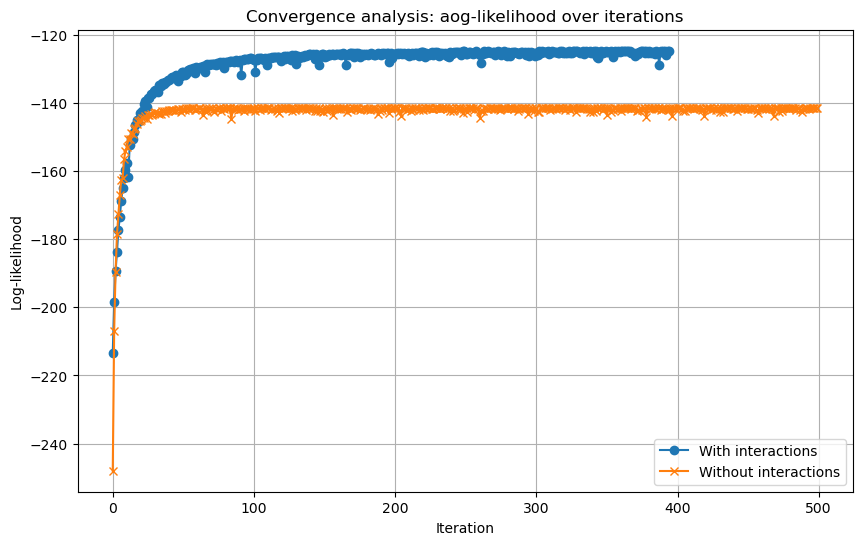

In [7]:
# 3. Convergence analysis:
# Plotting log-likelihood convergence
plt.figure(figsize=(10, 6))
plt.plot(log_likelihoods_with_interactions, label='With interactions', marker='o')
plt.plot(log_likelihoods_without_interactions, label='Without interactions', marker='x')
plt.title('Convergence analysis: aog-likelihood over iterations')
plt.xlabel('Iteration')
plt.ylabel('Log-likelihood')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# 4. Compare the classification performance
models = {
    "Custom SGD Logistic Regression": LogisticRegressionSGD(learning_rate=0.01, n_iterations=1000, add_interactions=False),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [9]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Evaluate models
for name, model in models.items():
    # Fit the model
    if name == "Custom SGD Logistic Regression":
        model.fit(X_train, y_train)  # Custom fit method does not return self by default
    else:
        model.fit(X_train, y_train)
    
    # Predict and evaluate
    predictions = model.predict(X_test) if name != "Custom SGD Logistic Regression" else model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    print(f"{name}: Balanced Accuracy = {balanced_accuracy:.4f}")

Converged at iteration 63.
Custom SGD Logistic Regression: Balanced Accuracy = 0.9251
LDA: Balanced Accuracy = 0.9169
QDA: Balanced Accuracy = 0.9848
Decision Tree: Balanced Accuracy = 0.9299
Random Forest: Balanced Accuracy = 0.9445


In [10]:
# 5. In the case of small datasets, please compare the two versions of the logistic regression: model without interactions and model with interactions.

False


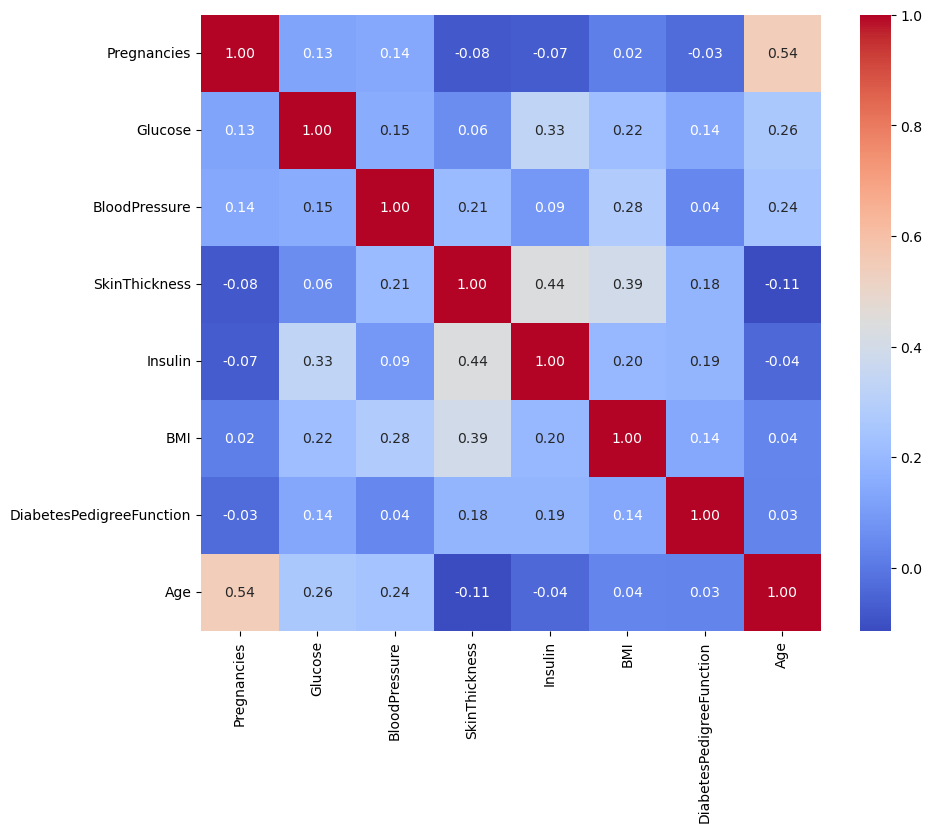

False
          Amount  Age     Income      Debt  CreditScore
0         998.99   56   42524.98   8394.05          655
1         241.39   52   69884.04  28434.06          395
2         836.42   58  126953.62  39121.78          496
3         612.74   19  128650.70  39652.48          612
4         135.55   59  102020.39   7439.81          302
...          ...  ...        ...       ...          ...
1999995  3478.81   20  127482.32   6161.07          796
1999996  2337.90   22   94866.98  21614.64          660
1999997  2142.04   51  137229.33   5654.83          432
1999998  2452.60   45  129794.90  34964.36          317
1999999  4385.23   49   81110.21  44744.80          312

[2000000 rows x 5 columns]


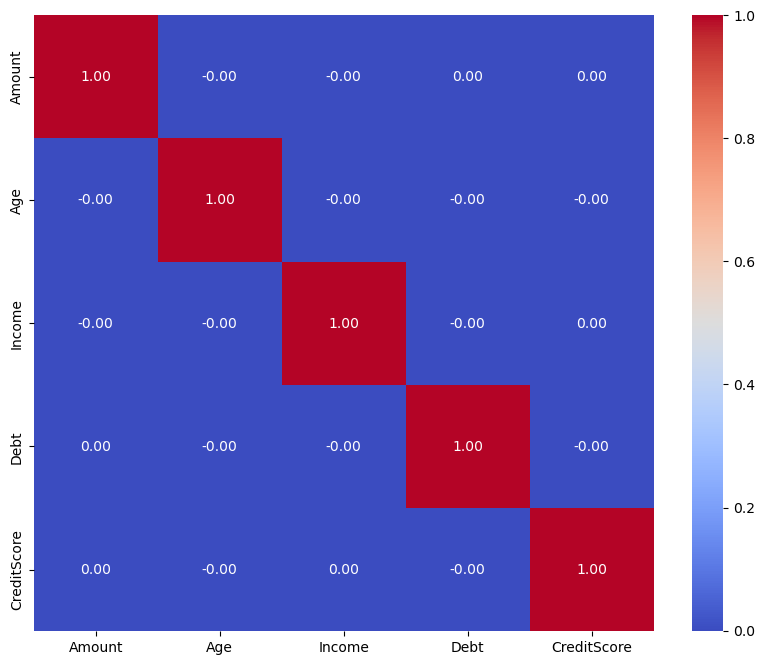

False


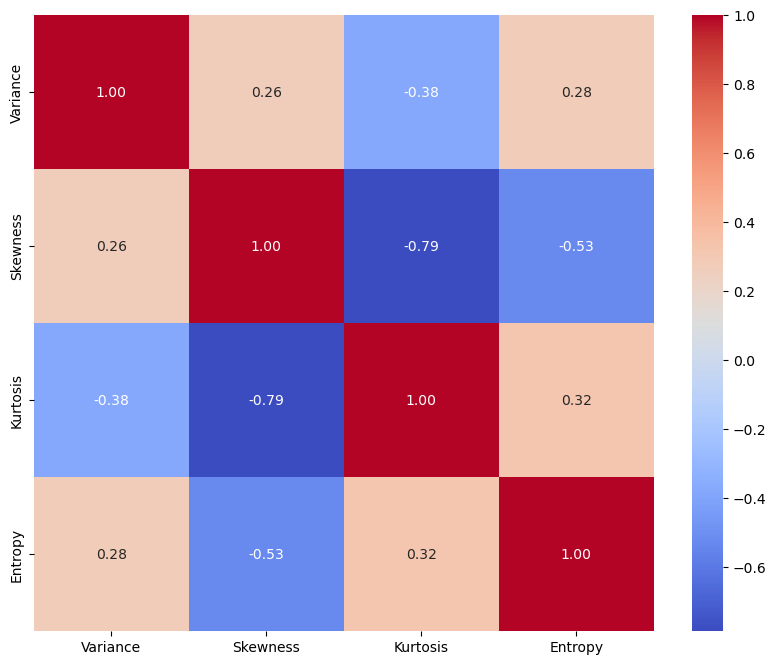

      Principal Component 1  Principal Component 2  Class
0                 -1.472805              -1.163917      0
1                 -1.639441              -1.093812      0
2                  0.513919              -1.324880      0
3                 -2.310952              -0.202514      0
4                  1.193416               0.024654      0
...                     ...                    ...    ...
1367              -0.221995              -0.290458      1
1368               1.909395               0.142149      1
1369               4.049327               2.036023      1
1370               3.019617               1.392140      1
1371               1.170582               0.091031      1

[1372 rows x 3 columns]
Explained variance ratio: [0.54497602 0.32328872]


In [3]:
%run "3_small_datasets.ipynb" # Add your path to 3_small_datasets.ipynb file, e.g. "C:/Project1/3_small_datasets.ipynb"

In [12]:
diabets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
X_diabets = diabets.drop('Outcome', axis=1)
y_diabets = diabets['Outcome']

In [14]:
X_diabets = X_diabets.to_numpy()

In [15]:
y_diabets = y_diabets.to_numpy()

In [16]:
n_splits = 5
balanced_accuracies_without_interactions = []
balanced_accuracies_with_interactions = []

for split in range(n_splits):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_diabets, y_diabets, test_size=0.2)

    # Train and evaluate the model without interactions
    model_without_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=False)
    model_without_interactions.fit(X_train, y_train)
    predictions_without = model_without_interactions.predict(X_test)
    balanced_accuracy_without = balanced_accuracy_score(y_test, predictions_without)
    balanced_accuracies_without_interactions.append(balanced_accuracy_without)

    # Train and evaluate the model with interactions
    model_with_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=True)
    model_with_interactions.fit(X_train, y_train)
    predictions_with = model_with_interactions.predict(X_test)
    balanced_accuracy_with = balanced_accuracy_score(y_test, predictions_with)
    balanced_accuracies_with_interactions.append(balanced_accuracy_with)

# Calculate and print average balanced accuracies
avg_balanced_accuracy_without = np.mean(balanced_accuracies_without_interactions)
avg_balanced_accuracy_with = np.mean(balanced_accuracies_with_interactions)

print(f"Average balanced accuracy without interactions: {avg_balanced_accuracy_without}")
print(f"Average balanced accuracy with interactions: {avg_balanced_accuracy_with}")

C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Converged at iteration 257.


C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Converged at iteration 6.


C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Converged at iteration 90.


C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Converged at iteration 190.


C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Converged at iteration 23.


C:\Users\HP\AppData\Local\Temp\ipykernel_11532\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Converged at iteration 45.
Average balanced accuracy without interactions: 0.5603946987582574
Average balanced accuracy with interactions: 0.5663030194909129


In [4]:
data_with_class_fraud

,amount,age,income,debt,credit_score,is_fraud
0,998.99,56,42524.98,8394.05,655,0
1,241.39,52,69884.04,28434.06,395,0
2,836.42,58,126953.62,39121.78,496,0
3,612.74,19,128650.70,39652.48,612,0
4,135.55,59,102020.39,7439.81,302,0
...,...,...,...,...,...,...
1999995,3478.81,20,127482.32,6161.07,796,1
1999996,2337.90,22,94866.98,21614.64,660,1
1999997,2142.04,51,137229.33,5654.83,432,1
1999998,2452.60,45,129794.90,34964.36,317,1


In [5]:
X_fraud = data_with_class_fraud.drop('is_fraud', axis=1)
y_fraud = data_with_class_fraud['is_fraud']

In [6]:
X_fraud = X_fraud.to_numpy()

In [7]:
y_fraud = y_fraud.to_numpy()

In [8]:
n_splits = 5
balanced_accuracies_without_interactions = []
balanced_accuracies_with_interactions = []

for split in range(n_splits):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_fraud, y_fraud, test_size=0.2)

    # Train and evaluate the model without interactions
    model_without_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=1, add_interactions=False)
    model_without_interactions.fit(X_train, y_train)
    predictions_without = model_without_interactions.predict(X_test)
    balanced_accuracy_without = balanced_accuracy_score(y_test, predictions_without)
    balanced_accuracies_without_interactions.append(balanced_accuracy_without)

    # Train and evaluate the model with interactions
    model_with_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=1, add_interactions=True)
    model_with_interactions.fit(X_train, y_train)
    predictions_with = model_with_interactions.predict(X_test)
    balanced_accuracy_with = balanced_accuracy_score(y_test, predictions_with)
    balanced_accuracies_with_interactions.append(balanced_accuracy_with)

# Calculate and print average balanced accuracies
avg_balanced_accuracy_without = np.mean(balanced_accuracies_without_interactions)
avg_balanced_accuracy_with = np.mean(balanced_accuracies_with_interactions)

print(f"Average balanced accuracy without interactions: {avg_balanced_accuracy_without}")
print(f"Average balanced accuracy with interactions: {avg_balanced_accuracy_with}")

C:\Users\HP\AppData\Local\Temp\ipykernel_19952\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_19952\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_19952\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_19952\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_19952\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_19952\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_19952\3230674940.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\T

Average balanced accuracy without interactions: 0.93859606757552
Average balanced accuracy with interactions: 0.9148076085801218


In [9]:
pca_df_banknote

,Principal Component 1,Principal Component 2,Class
0,-1.472805,-1.163917,0
1,-1.639441,-1.093812,0
2,0.513919,-1.324880,0
3,-2.310952,-0.202514,0
4,1.193416,0.024654,0
...,...,...,...
1367,-0.221995,-0.290458,1
1368,1.909395,0.142149,1
1369,4.049327,2.036023,1
1370,3.019617,1.392140,1


In [10]:
X_banknote = pca_df_banknote.drop('Class', axis=1)
y_banknote = pca_df_banknote['Class']
X_banknote = X_banknote.to_numpy()
y_banknote = y_banknote.to_numpy()

In [11]:
n_splits = 5
balanced_accuracies_without_interactions = []
balanced_accuracies_with_interactions = []

for split in range(n_splits):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_banknote, y_banknote, test_size=0.2)

    # Train and evaluate the model without interactions
    model_without_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=1, add_interactions=False)
    model_without_interactions.fit(X_train, y_train)
    predictions_without = model_without_interactions.predict(X_test)
    balanced_accuracy_without = balanced_accuracy_score(y_test, predictions_without)
    balanced_accuracies_without_interactions.append(balanced_accuracy_without)

    # Train and evaluate the model with interactions
    model_with_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=1, add_interactions=True)
    model_with_interactions.fit(X_train, y_train)
    predictions_with = model_with_interactions.predict(X_test)
    balanced_accuracy_with = balanced_accuracy_score(y_test, predictions_with)
    balanced_accuracies_with_interactions.append(balanced_accuracy_with)

# Calculate and print average balanced accuracies
avg_balanced_accuracy_without = np.mean(balanced_accuracies_without_interactions)
avg_balanced_accuracy_with = np.mean(balanced_accuracies_with_interactions)

print(f"Average balanced accuracy without interactions: {avg_balanced_accuracy_without}")
print(f"Average balanced accuracy with interactions: {avg_balanced_accuracy_with}")

Average balanced accuracy without interactions: 0.7697378895638669
Average balanced accuracy with interactions: 0.79748406905177
